In [15]:
import requests
import lxml.html as html
import os
import time
import unittest
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
from collections import Counter
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")




[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yairmendo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:

search_object = 'gamer chair'
names = []
prices = []
sales = []
url = 'https://www.amazon.com'
XPATH_NAME = './/a/span[@class="a-size-base-plus a-color-base a-text-normal" or @class="a-size-medium a-color-base a-text-normal"]/text()'
XPATH_PRICE = './/span[@class="a-offscreen" or class="a-color-base"]/text()'#XPATH_PRICE = '//span[@class="a-price-whole"]/text()'
XPATH_SALES = './/span[@class="a-size-base"]/text()'
XPATH_CARD = '//span[contains(@class, "template=SEARCH_RESULTS")]'
search_button_xpath = '/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input'
search_field_id ='twotabsearchtextbox'
next_button_css_selector = '.a-last > a:nth-child(1)'
wait = 2#seconds



In [4]:

def search_from_amazon():
    driver = webdriver.Firefox()
    driver.maximize_window()
    driver.get(url)
    search_button = driver.find_element_by_xpath(search_button_xpath)
    search_field = driver.find_element_by_id(search_field_id)
    search_field.send_keys(search_object)
    search_button.click()
    time.sleep(wait)
    while len(prices)< 100:
        page_object = driver.page_source
        parsed = html.fromstring(page_object)
        card_object = parsed.xpath(XPATH_CARD)
        for card in card_object:
            names.append(card.xpath(XPATH_NAME))
            prices.append(card.xpath(XPATH_PRICE))
            sales.append(card.xpath(XPATH_SALES))
        time.sleep(wait)
        driver.execute_script("window.scrollTo(0, 9500)")
        next_button = driver.find_element_by_css_selector(next_button_css_selector)
        next_button.click()
        time.sleep(wait)
    driver.quit()

In [5]:
search_from_amazon()

In [6]:
names

[['Hbada Gaming Chair Racing Style Ergonomic High Back Computer Chair with Height Adjustment, Headrest and Lumbar Support E-Sports Swivel Chair, Red(1-Year Warranty)'],
 ['Ptoulemy Massage Gaming Chair Big and Tall Video Game Chair Heavy Duty 360 Swivel Ergonomic Computer Gamer Chair Racing Style 90°-180° Adjustable High Back Headrest and Lumbar Support (White)'],
 ['Gaming Chair with Footrest Ergonomic Computer Gaming Chairs Video Game Chair PC Racing Computer Chair for Gamer with Lumbar Support (Black)'],
 ['Bowthy Massage Gaming Chair for Adults Computer Ergonomic Game Chair Heavy Duty Big and Tall Gamer Chair Racing Style Headrest and Lumbar Support (White)'],
 ['GTRACING Gaming Chair Racing Office Computer Ergonomic Video Game Chair Backrest and Seat Height Adjustable Swivel Recliner with Headrest and Lumbar Pillow E-Sports Chair (Red)'],
 ['Hbada Gaming Chair Racing Style Ergonomic High Back Computer Chair with Height Adjustment, Headrest and Lumbar Support E-Sports Swivel Chair,

In [41]:
english_stopwords = set(stopwords.words('english'))

In [78]:
def tokenize_phrase(phrase):
    parsed_phrase = nlp(str(phrase))
    for token in parsed_phrase:
        if token.is_punct or token.is_stop or token.text.lower() in english_stopwords:
            continue
        yield token.lemma_.lower()

In [77]:
parsed_phrase = nlp(str(names))
for token in parsed_phrase:
    print(token)

[
[
'
Hbada
Gaming
Chair
Racing
Style
Ergonomic
High
Back
Computer
Chair
with
Height
Adjustment
,
Headrest
and
Lumbar
Support
E
-
Sports
Swivel
Chair
,
Red(1-Year
Warranty
)
'
]
,
[
'
Ptoulemy
Massage
Gaming
Chair
Big
and
Tall
Video
Game
Chair
Heavy
Duty
360
Swivel
Ergonomic
Computer
Gamer
Chair
Racing
Style
90
°
-180
°
Adjustable
High
Back
Headrest
and
Lumbar
Support
(
White
)
'
]
,
[
'
Gaming
Chair
with
Footrest
Ergonomic
Computer
Gaming
Chairs
Video
Game
Chair
PC
Racing
Computer
Chair
for
Gamer
with
Lumbar
Support
(
Black
)
'
]
,
[
'
Bowthy
Massage
Gaming
Chair
for
Adults
Computer
Ergonomic
Game
Chair
Heavy
Duty
Big
and
Tall
Gamer
Chair
Racing
Style
Headrest
and
Lumbar
Support
(
White
)
'
]
,
[
'
GTRACING
Gaming
Chair
Racing
Office
Computer
Ergonomic
Video
Game
Chair
Backrest
and
Seat
Height
Adjustable
Swivel
Recliner
with
Headrest
and
Lumbar
Pillow
E
-
Sports
Chair
(
Red
)
'
]
,
[
'
Hbada
Gaming
Chair
Racing
Style
Ergonomic
High
Back
Computer
Chair
with
Height
Adjustment
,
Headrest

'
Soontrans
Gaming
Chair
for
Adults
Kids
,
PC
Computer
Chair
,
Home
Office
Chair
,
Racing
Chair
with
Adjustable
Recliner
and
Armrest
and
Retractable
Footrest
with
Headrest
Lumbar
Pillow
Support（Reddish
Blue
）
'
]
,
[
'
AKRacing
Core
Series
EX
-
Wide
Gaming
Chair
with
Wide
Seat
,
High
and
Wide
Backrest
,
Recliner
,
Swivel
,
Tilt
,
Rocker
and
Seat
Height
Adjustment
Mechanisms
with
5/10
warranty
-
Red
/
Black
'
]
,
[
'
Furious
Gaming
Chair
Racing
Style
Swivel
Computer
Gamer
Chair
with
Fully
Foam
,
Esports
Video
Game
Chair
,
PU
Leather
Executive
Office
Chair
with
Lift
Headrest
and
Lumbar
Support
Gray
'
]
,
[
'
Hbada
Gaming
Chair
Ergonomic
PC
Gaming
Chair
Racing
Style
Computer
Chair
with
Padded
Armrest
,
Headrest
and
Lumbar
Support
Recline
Chair
with
Height
Adjustable
seat
,
Swivel
Caster
and
Footrest
,
Gray
'
]
,
[
'
AutoFull
Computer
Gaming
Chair
-
Adjustable
Reclining
High
-
Back
PU
Leather
Swivel
Game
Chair
with
Headrest
and
Lumbar
Support
(
PU
,
B
-
Red
)
'
]
,
[
'
Bowthy
Massage
Gamin

In [83]:
word_counter = Counter()
for name in names:
    word_counter.update(tokenize_phrase(name))

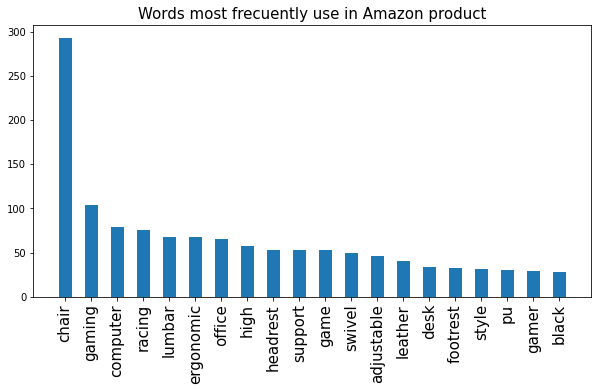

In [84]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()

labels, values = zip(*word_counter.most_common(20))

indexes = np.arange(len(labels))
width = 1

ax.bar(indexes, values, 0.5)
ax.set_xticks(indexes)
ax.set_xticklabels( labels, rotation=90, fontsize=15)
ax.set_title("Words most frecuently use in Amazon product", fontsize=15)
plt.show()

In [85]:
print(word_counter.most_common(3))


[('chair', 293), ('gaming', 104), ('computer', 79)]
